### Integration using different methods

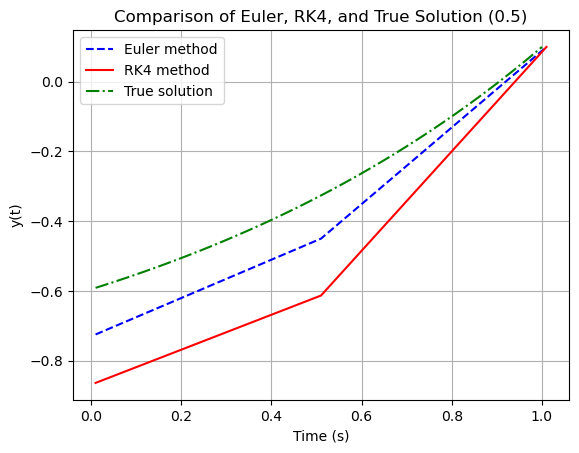

Euler method: The final value of y at t=1s is: -0.7250000000000001
RK4 method: The final value of y at t=1s is: -0.864044189453125
True solution: The final value of y at t=1s is: -0.5912656398757498


In [27]:
import numpy as np
import matplotlib.pyplot as plt


y0 = 0.1  
t0 = 0.01 
t_end = 1  
dt = 0.5


t_values_1 = np.arange(0.01,1+0.01,0.01)
t_values = np.arange(t0, t_end + dt , dt)
n_steps = len(t_values)


y_euler = np.zeros(n_steps)
y_rk4 = np.zeros(n_steps)

y_euler[0] = y0
y_rk4[0] = y0

def dydt(y):
    return y + 1


for i in range(1, n_steps):
    y_euler[i] = y_euler[i - 1] - dt * dydt(y_euler[i - 1])

for i in range(1, n_steps):
    k1 = dt * dydt(y_rk4[i - 1])
    k2 = dt * dydt(y_rk4[i - 1] + k1 / 2)
    k3 = dt * dydt(y_rk4[i - 1] + k2 / 2)
    k4 = dt * dydt(y_rk4[i - 1] + k3)
    y_rk4[i] = y_rk4[i - 1] - (k1 + 2 * k2 + 2 * k3 + k4) / 6

C = 1.1 * np.exp(-1)  
y_true = C * np.exp(t_values_1) - 1

y_euler.sort()
y_rk4.sort()
plt.plot(t_values, y_euler, label="Euler method", color='blue', linestyle='--')
plt.plot(t_values, y_rk4, label="RK4 method", color='red', linestyle='-')
plt.plot(t_values_1, y_true, label="True solution", color='green', linestyle='-.')

plt.xlabel("Time (s)")
plt.ylabel("y(t)")
plt.title("Comparison of Euler, RK4, and True Solution (0.5)")
plt.legend()
plt.grid(True)
# plt.savefig('Q05.png')
plt.show()

# Print final results
print(f"Euler method: The final value of y at t={t_end}s is: {y_euler[0]}")
print(f"RK4 method: The final value of y at t={t_end}s is: {y_rk4[0]}")
print(f"True solution: The final value of y at t={t_end}s is: {y_true[0]}")
